In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,  ConfusionMatrixDisplay
from matplotlib.pylab import rcParams
#!pip install liac-arff
import arff


# Exploratory data analysis
## Preprocessing
### Replacing strings in the arff

Especially this line is important:

`line.replace('	', '').replace(',,',',').replace('ckd,\n', 'ckd\n').replace(' yes','yes')`

otherwise, the file could not be opened

In [3]:
fin = open("data/chronic_kidney_disease_full.arff", "rt")
#output file to write the result to
fout = open("preprocessed/chronic_kidney_disease_full.arff", "wt")
#for each line in the input file
for line in fin:
	#read replace the string and write to output file
	fout.write(line.replace('	', '').replace(',,',',').replace('ckd,\n', 'ckd\n').replace(' yes','yes'))
#close input and output files
fin.close()

dataset = arff.load(open("preprocessed/chronic_kidney_disease_full.arff", "r"))
print(dataset['description'])

1. Title: Early stage of Indians Chronic Kidney Disease(CKD)

2. Source Information:
  (a) Source:
Dr.P.Soundarapandian.M.D.,D.M
    (Senior Consultant Nephrologist),
Apollo  Hospitals,
Managiri,
Madurai Main Road,
Karaikudi,
Tamilnadu,
India.
  (b) Creator:
L.Jerlin Rubini(Research Scholar)
Alagappa University
EmailId   :jel.jerlin@gmail.com
ContactNo :+91-9597231281
  (c) Guided by:
Dr.P.Eswaran Assistant Professor,
Department of Computer Science and Engineering,
Alagappa University,
Karaikudi,
Tamilnadu,
India.
Emailid:eswaranperumal@gmail.com
  (d) Date     : july 2015

3.Relevant Information:
age-age
bp-blood pressure
sg-specific gravity
al-   albumin
su-sugar
rbc-red blood cells
pc-pus cell
pcc-pus cell clumps
ba-bacteria
bgr-blood glucose random
bu-blood urea
sc-serum creatinine
sod-sodium
pot-potassium
hemo-hemoglobin
pcv-packed cell volume
wc-white blood cell count
rc-red blood cell count
htn-hypertension
dm-diabetes mellitus
cad-coronary artery disease
appet-appetite
pe-pedal

## Investigating the attributes

In [4]:
numeric_columns = []
categorical_columns = []
column_names = []

for idx, attr in enumerate(dataset['attributes']):
    column_names.append(attr[0])
    if attr[1] == 'NUMERIC':
        numeric_columns.append(attr[0])
    else:
        categorical_columns.append(attr[0])
    print(attr[0], attr[1])
    

print('\nnumeric:',numeric_columns)
print('categorical:',categorical_columns)

age NUMERIC
bp NUMERIC
sg ['1.005', '1.010', '1.015', '1.020', '1.025']
al ['0', '1', '2', '3', '4', '5']
su ['0', '1', '2', '3', '4', '5']
rbc ['normal', 'abnormal']
pc ['normal', 'abnormal']
pcc ['present', 'notpresent']
ba ['present', 'notpresent']
bgr NUMERIC
bu NUMERIC
sc NUMERIC
sod NUMERIC
pot NUMERIC
hemo NUMERIC
pcv NUMERIC
wbcc NUMERIC
rbcc NUMERIC
htn ['yes', 'no']
dm ['yes', 'no']
cad ['yes', 'no']
appet ['good', 'poor']
pe ['yes', 'no']
ane ['yes', 'no']
class ['ckd', 'notckd']

numeric: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [5]:
df = pd.DataFrame(dataset['data'], columns=column_names)
df.to_csv('preprocessed/df.csv', index=False)  
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,None,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,None,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


### None values in categorical attributes

In [6]:
def print_range_of_values(dataframe, columns):
    for col in columns:
        print(col, '\t',dataframe[col].unique())

print_range_of_values(df, categorical_columns)

sg 	 ['1.020' '1.010' '1.005' '1.015' None '1.025']
al 	 ['1' '4' '2' '3' '0' None '5']
su 	 ['0' '3' '4' '1' None '2' '5']
rbc 	 [None 'normal' 'abnormal']
pc 	 ['normal' 'abnormal' None]
pcc 	 ['notpresent' 'present' None]
ba 	 ['notpresent' 'present' None]
htn 	 ['yes' 'no' None]
dm 	 ['yes' 'no' None]
cad 	 ['no' 'yes' None]
appet 	 ['good' 'poor' None]
pe 	 ['no' 'yes' None]
ane 	 ['no' 'yes' None]
class 	 ['ckd' 'notckd']


### NaN values in categorical attributes

In [7]:
def print_nr_nan(dataframe, columns):
    for col in columns:
        print(col, '\t',np.count_nonzero(dataframe[col].isna().values), '\tNaN values',)
        
print_nr_nan(df, categorical_columns)

sg 	 47 	NaN values
al 	 46 	NaN values
su 	 49 	NaN values
rbc 	 149 	NaN values
pc 	 62 	NaN values
pcc 	 4 	NaN values
ba 	 4 	NaN values
htn 	 2 	NaN values
dm 	 2 	NaN values
cad 	 2 	NaN values
appet 	 1 	NaN values
pe 	 1 	NaN values
ane 	 1 	NaN values
class 	 0 	NaN values


### Nan values in numerical attributes


In [8]:
print_nr_nan(df, numeric_columns)

age 	 9 	NaN values
bp 	 12 	NaN values
bgr 	 43 	NaN values
bu 	 18 	NaN values
sc 	 17 	NaN values
sod 	 86 	NaN values
pot 	 87 	NaN values
hemo 	 51 	NaN values
pcv 	 70 	NaN values
wbcc 	 106 	NaN values
rbcc 	 131 	NaN values


- wbcc has 106 nan values out of 400 in total (White blood cell count)
- rbcc has 131 nan values out of 400 in total (Red blood cell count)
  

## Exploratory data analysis

In [9]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,340.000000,337.000000,302,303,300,200,287,345,345,306.000000,...,279.000000,243.000000,218.000000,347,347,347,348,348,348,349
unique,NaN,NaN,5,6,6,2,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,1.020,0,0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,85,148,239,153,211,303,323,NaN,...,NaN,NaN,NaN,200,210,313,266,272,288,250
mean,51.670588,77.210682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.810458,...,37.311828,8556.378601,4.541284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.017006,14.160858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.629828,...,8.697529,3113.193474,1.032219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,43.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.250000,...,31.000000,6700.000000,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,...,38.000000,8200.000000,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.250000,...,44.000000,9800.000000,5.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove NaN and None values by replacing with mean and most frequent values.
--> is this clever? probably not haha

In [10]:
# from sklearn.impute import SimpleImputer
# import math

# # For numeric columns, use the mean imputation method
# numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# nan_removed = df.copy()
# nan_removed[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
# nan_removed[numeric_columns]

# # For categorical columns, use the most frequent value imputation method
# categorical_none_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
# categorical_nan_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# nan_removed[categorical_columns] = categorical_nan_imputer.fit_transform(df[categorical_columns])
# nan_removed[categorical_columns] = categorical_none_imputer.fit_transform(nan_removed[categorical_columns])


In [11]:
# print_nr_nan(nan_removed, numeric_columns)

In [12]:
# print_nr_nan(nan_removed, categorical_columns)

In [13]:
# print_range_of_values(nan_removed, categorical_columns)

## Visualizations
### Histograms

age 	 9 	NaN values


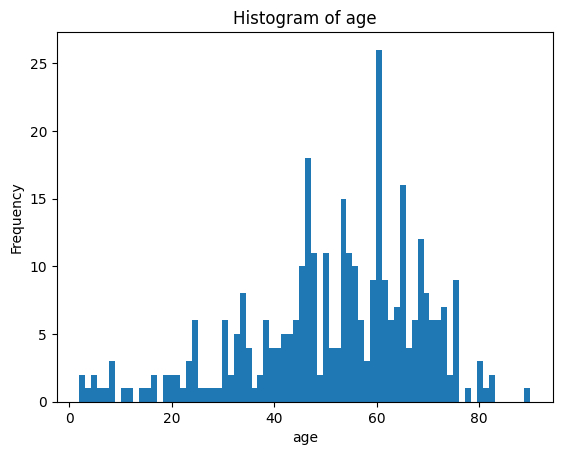

bp 	 12 	NaN values


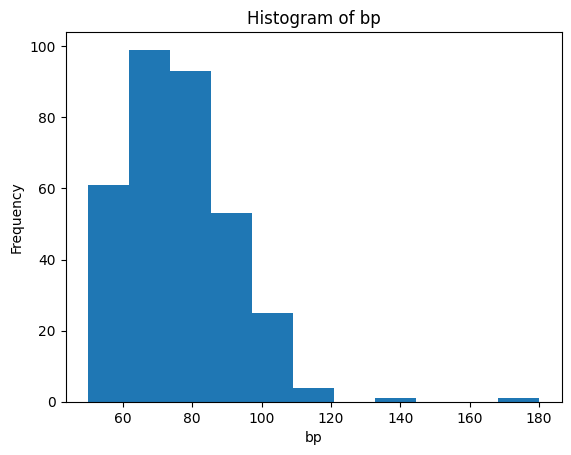

bgr 	 43 	NaN values


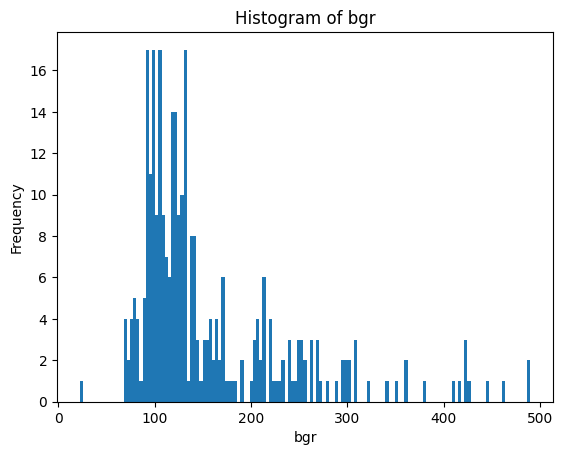

bu 	 18 	NaN values


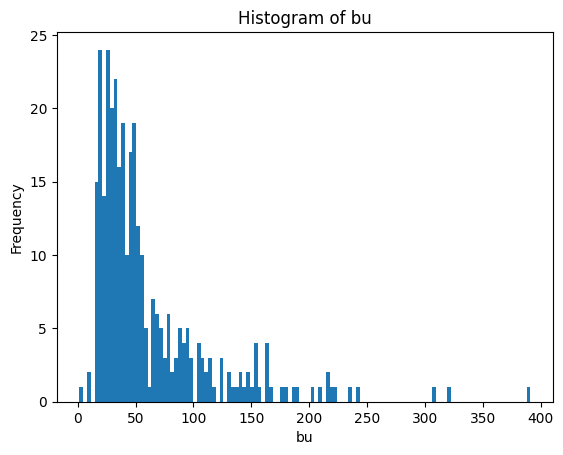

sc 	 17 	NaN values


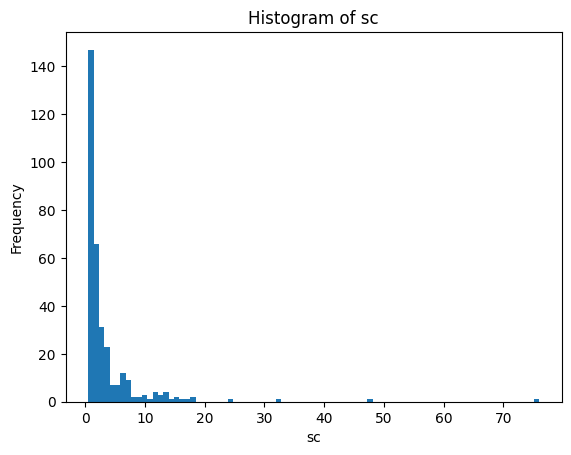

sod 	 86 	NaN values


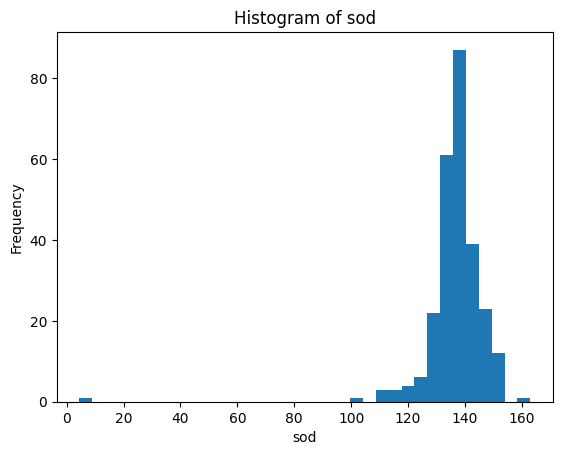

pot 	 87 	NaN values


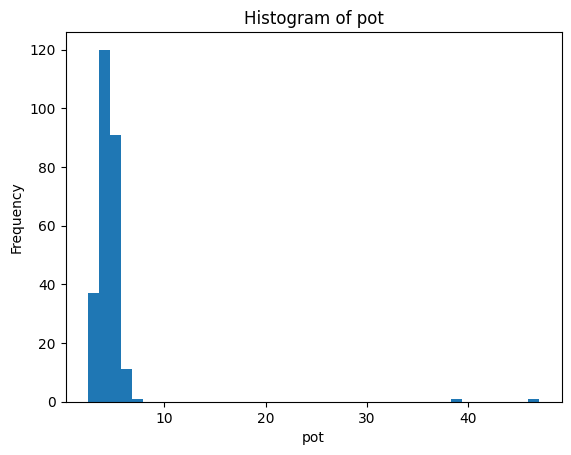

hemo 	 51 	NaN values


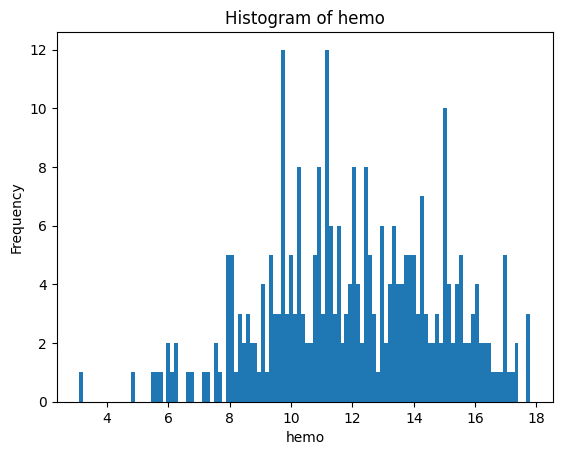

pcv 	 70 	NaN values


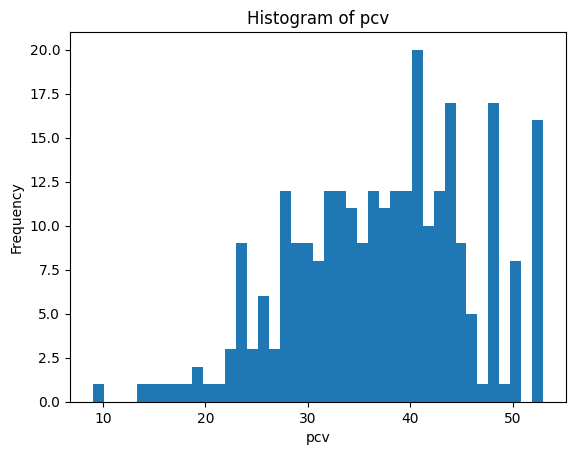

wbcc 	 106 	NaN values


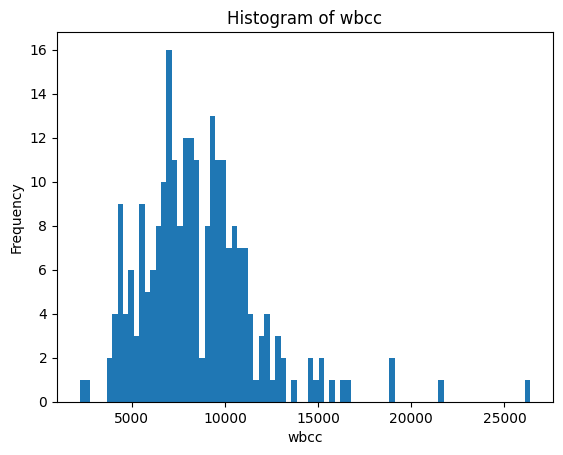

rbcc 	 131 	NaN values


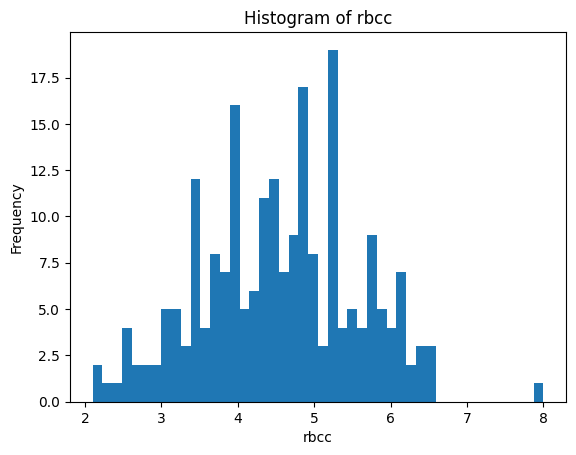

In [18]:
for col in numeric_columns:
    print_nr_nan(df, [col])
    plt.figure()
    plt.hist(df[col], bins=len(df[col].unique()))
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Box plots

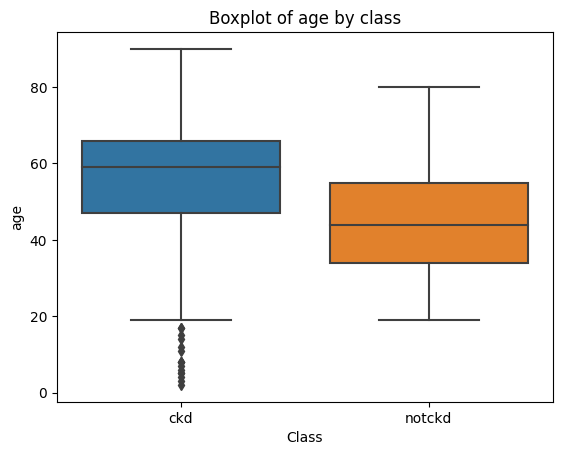

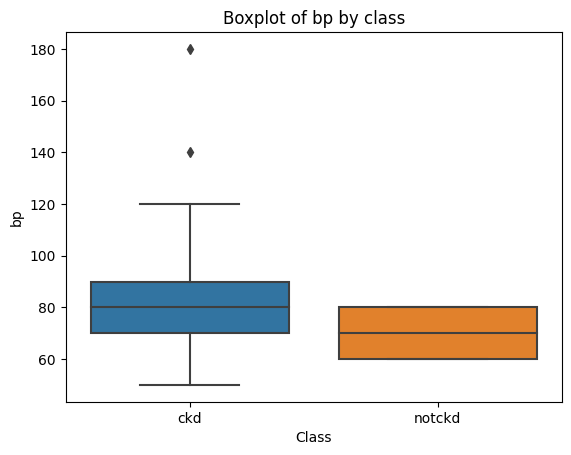

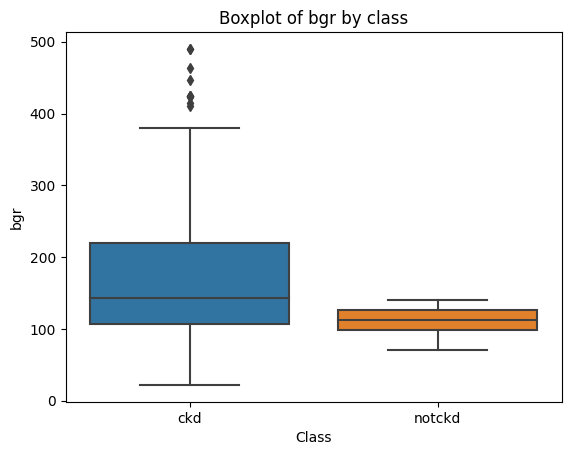

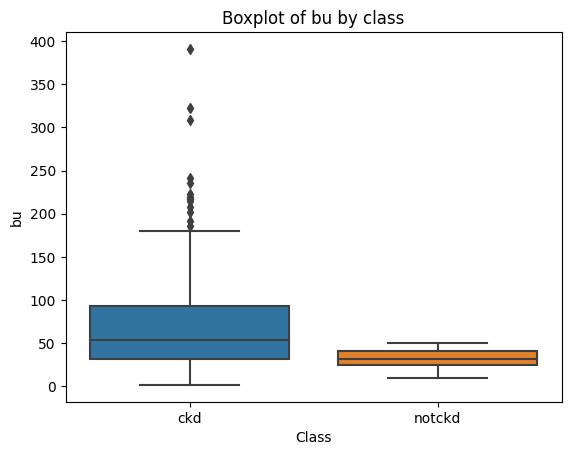

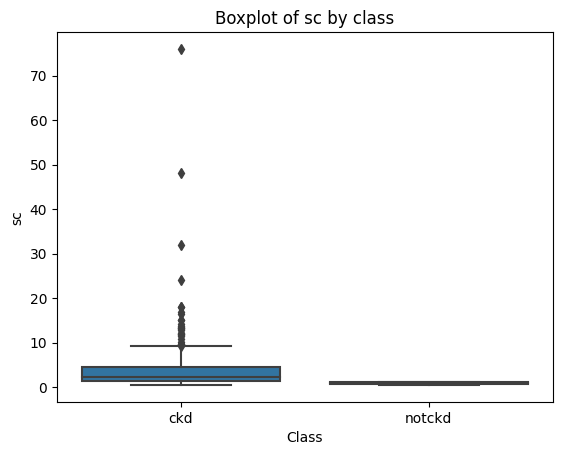

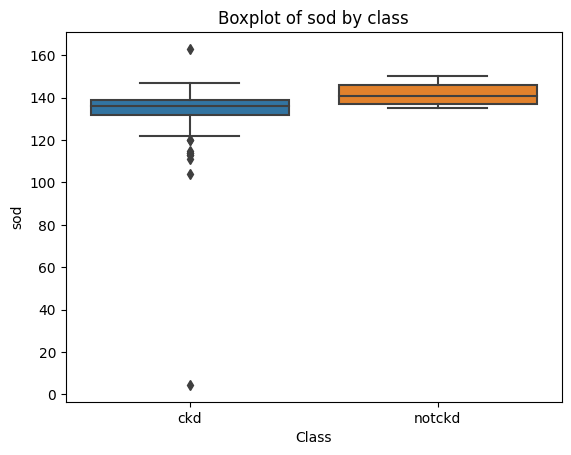

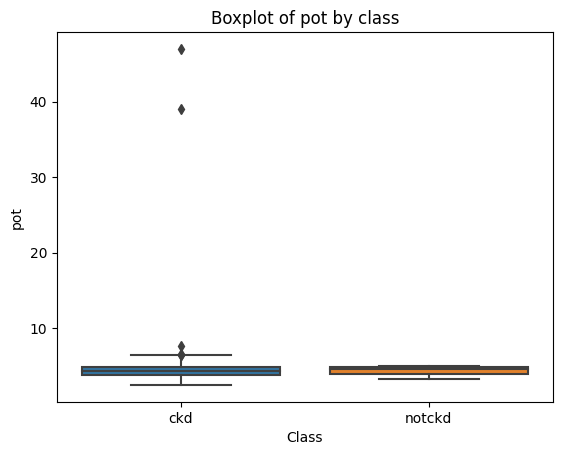

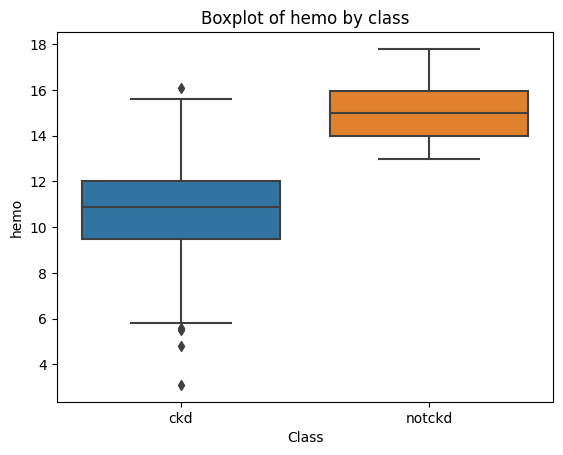

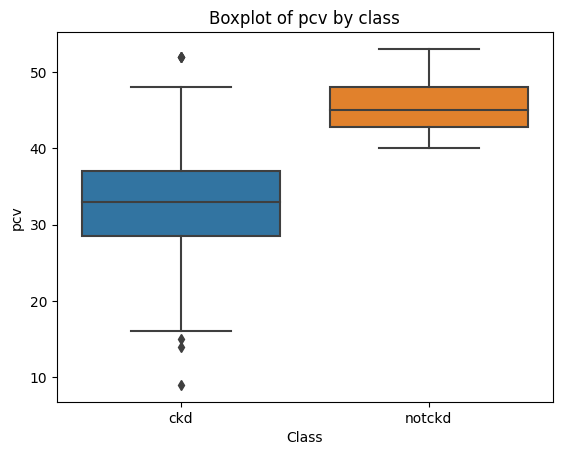

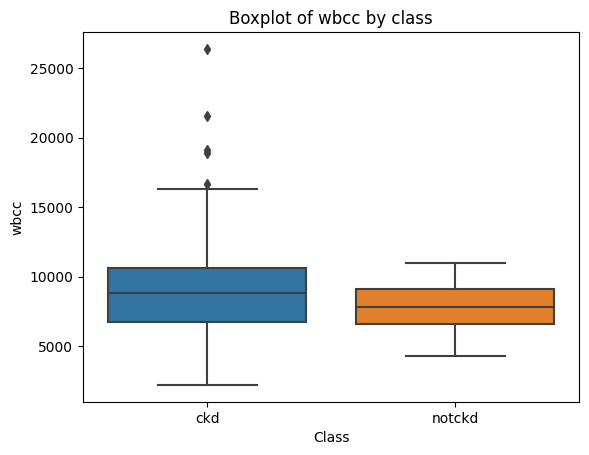

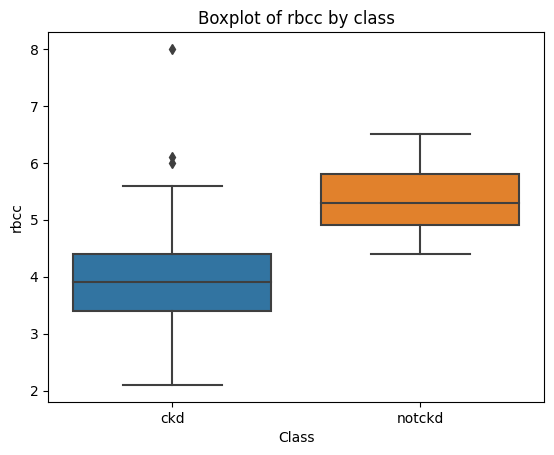

In [15]:
for col in numeric_columns:
    plt.figure()
    sns.boxplot(x="class", y=col, data=df)
    plt.title(f'Boxplot of {col} by class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

### Pair plots

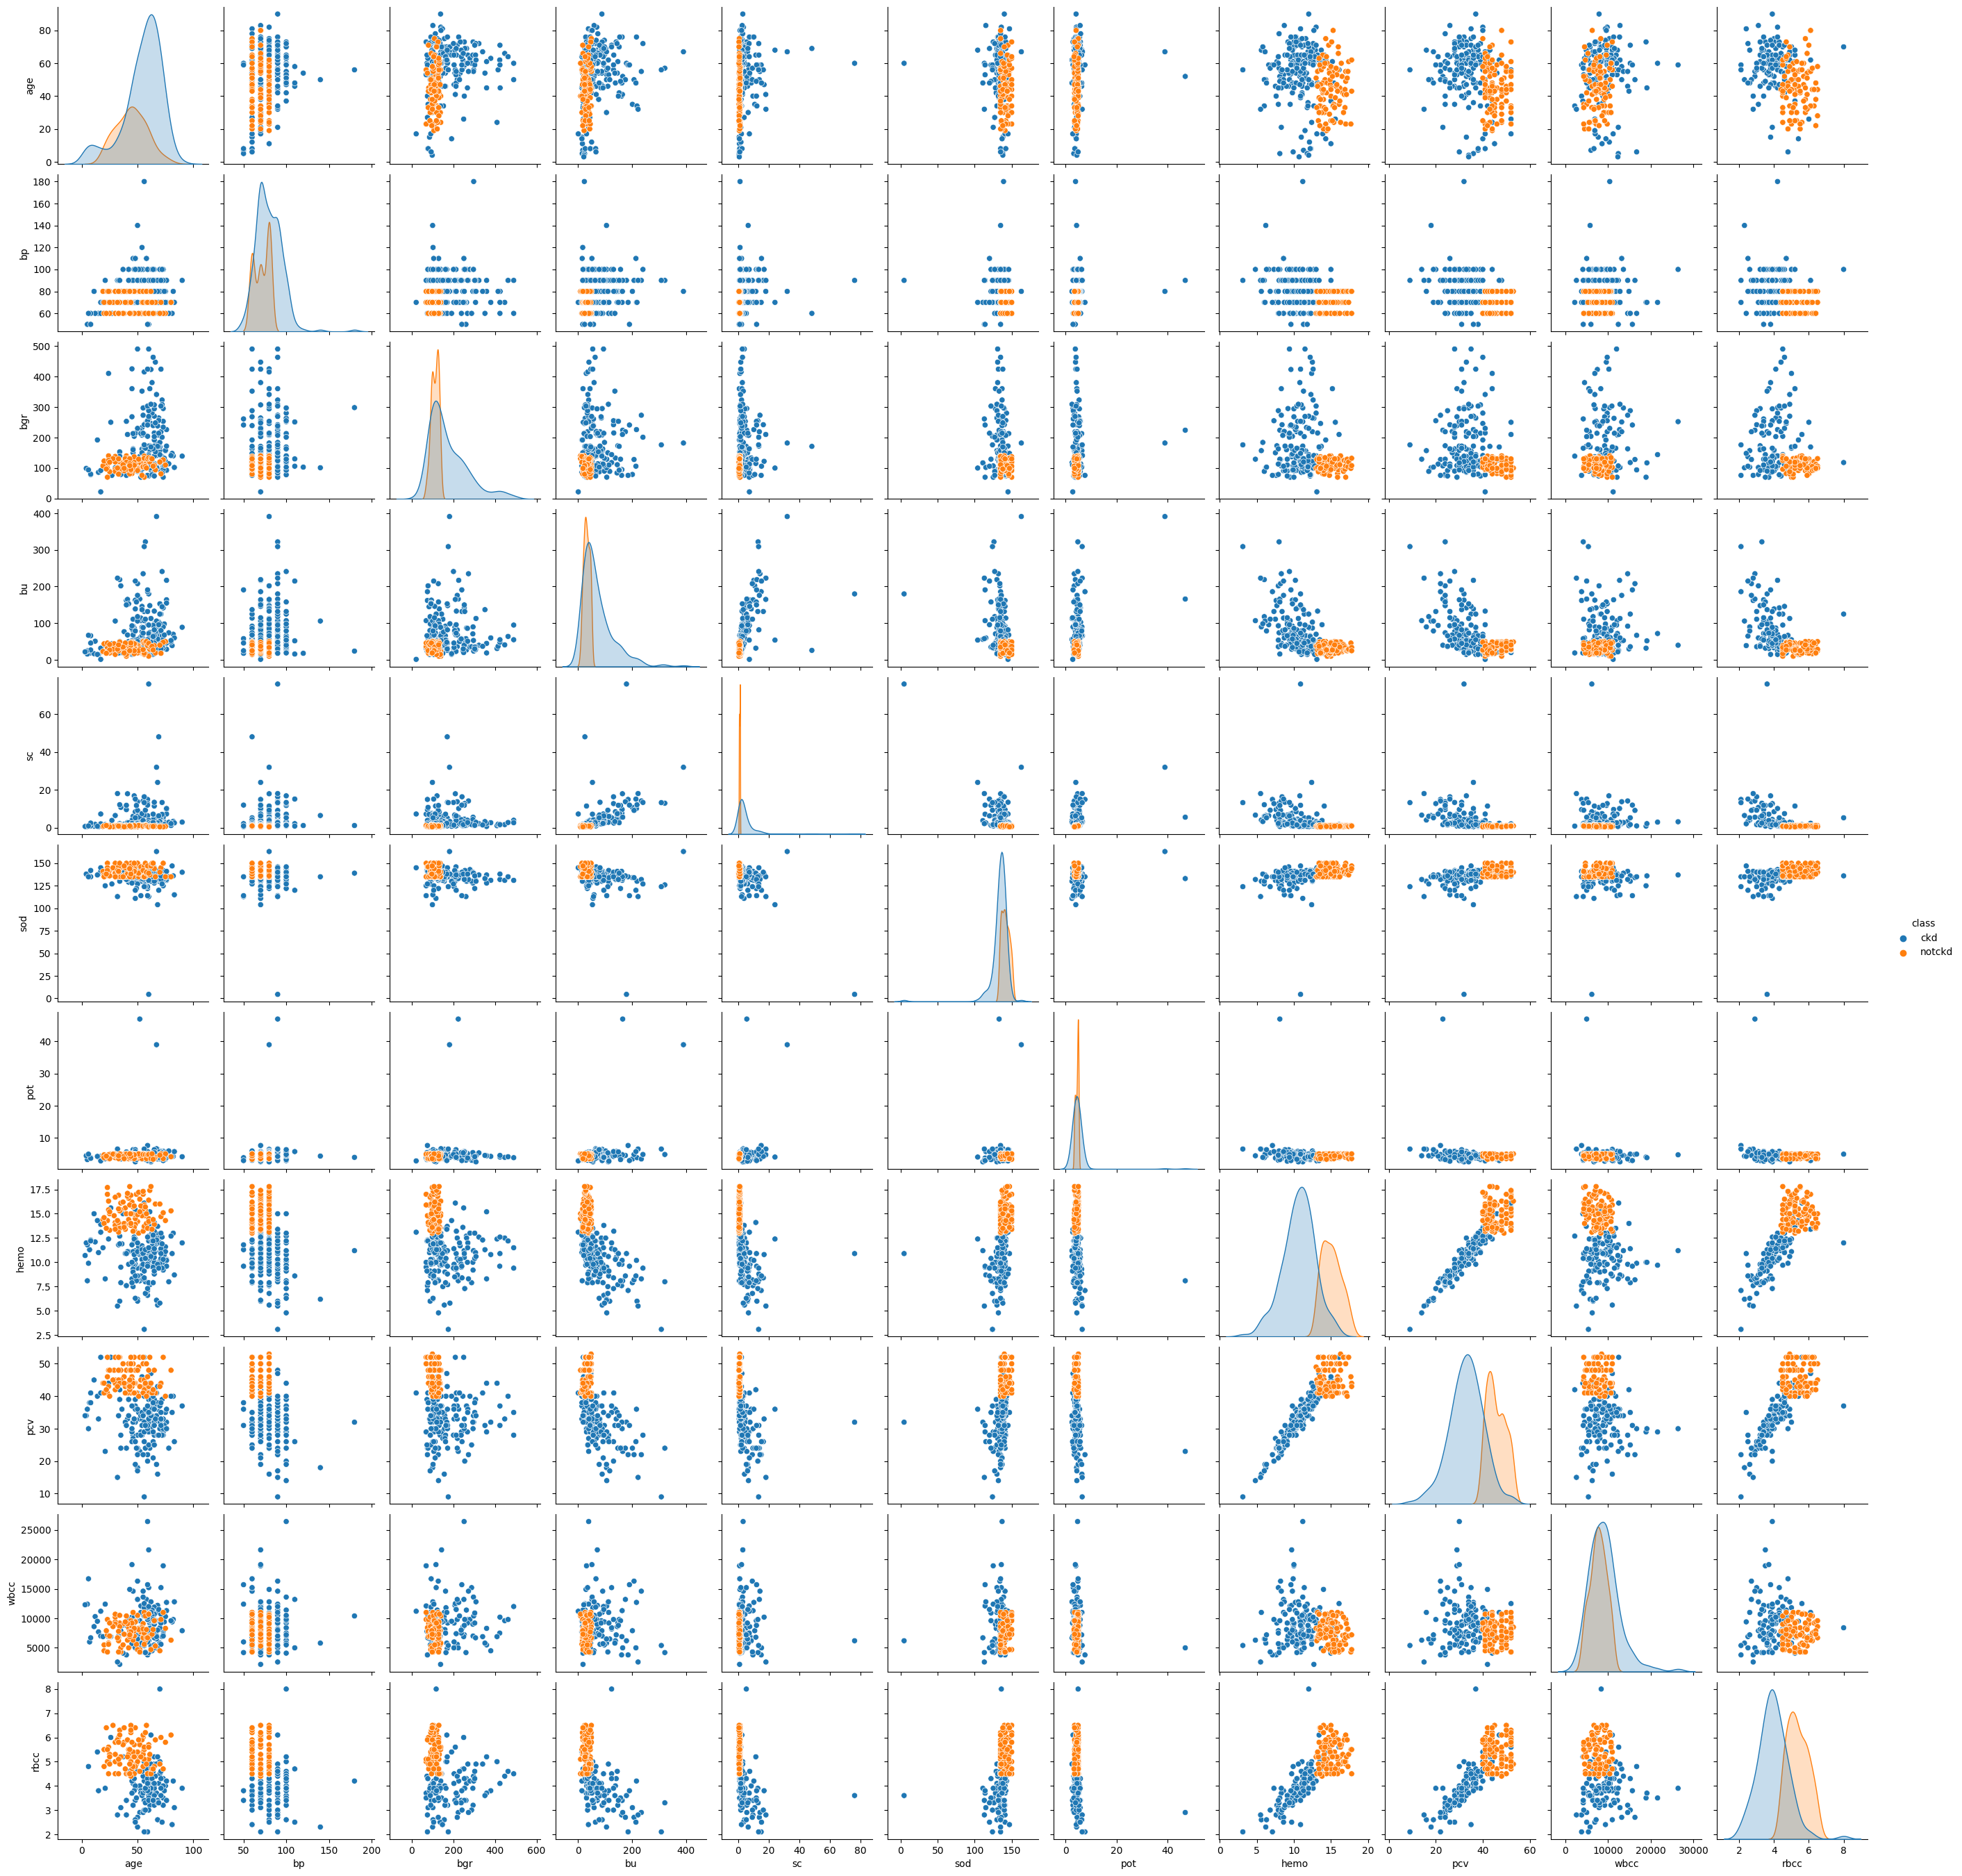

In [16]:
sns.pairplot(df, hue="class", vars=numeric_columns)
plt.show()